In [38]:
import requests
import pandas as pd

# 设置API的地址，调用token，设置headers、payload数据
# 通过 requests 的 get 方法来访问数据
# 数据以json 形式输入到 data 变量中
# 为了后续数据分析的方面，我们使用pandas 来解析和存储数据
# 获得指定国家地区、某天的感染数据等

# demo for infection/region
# input region, start_date, get data

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='Italy'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'start_date':'2020-03-24'
}

# call requets to load 
r = requests.get(url+'infection/region', params=payload, headers=headers)

data = r.json()

# use pandas to get the data
df = pd.DataFrame.from_dict(data['data']['region'][region])
print(df)
print('---')


               2020-03-24
confirmed           69176
confirmed_add        5249
deaths               6820
deaths_add            743
recovered            8326
recovered_add         894
---


In [42]:
# demo for infection/region
# input region, start_date, end_date, get data

# the params
payload = {
    'region': region,
    'start_date': '2020-03-28',
    'end_date': '2020-04-06'
}

# call requets to load 
r = requests.get(url+'infection/region', params=payload, headers=headers)

data = r.json()

#for key, value in data['data']['region'][region].items():
#    print(key, value)

# use pandas to get the data
df = pd.DataFrame.from_dict(data['data']['region'][region])
print(df)
# demo for infection/region
# input region, start_date, end_date, get dataprint('---')

               2020-03-28  2020-03-29  2020-03-30  2020-03-31  2020-04-01  \
confirmed_add        5974        5217        4050        4053        4782   
deaths_add            889         756         812         837         727   
recovered_add        1434         646        1590        1109        1118   
confirmed           92472       97689      101739      105792      110574   
deaths              10023       10779       11591       12428       13155   
recovered           12384       13030       14620       15729       16847   

               2020-04-02  2020-04-03  2020-04-04  2020-04-05  2020-04-06  
confirmed_add        4668        4585        4805        4316        3599  
deaths_add            760         766         681         525         636  
recovered_add        1431        1480        1238         819        1022  
confirmed          115242      119827      124632      128948      132547  
deaths              13915       14681       15362       15887       16523  
reco

In [43]:
# demo for infection/region
# input region, start_date, end_date, get data
# exchange the row and column by Pandas, the row index is date

df = df.T
print(df)
print('---')

            confirmed_add  deaths_add  recovered_add  confirmed  deaths  \
2020-03-28           5974         889           1434      92472   10023   
2020-03-29           5217         756            646      97689   10779   
2020-03-30           4050         812           1590     101739   11591   
2020-03-31           4053         837           1109     105792   12428   
2020-04-01           4782         727           1118     110574   13155   
2020-04-02           4668         760           1431     115242   13915   
2020-04-03           4585         766           1480     119827   14681   
2020-04-04           4805         681           1238     124632   15362   
2020-04-05           4316         525            819     128948   15887   
2020-04-06           3599         636           1022     132547   16523   

            recovered  
2020-03-28      12384  
2020-03-29      13030  
2020-03-30      14620  
2020-03-31      15729  
2020-04-01      16847  
2020-04-02      18278  
2020-0

In [44]:
# demo for infection/region
# input region, start_date, end_date, get data
# exchange the row and column by Pandas, the row index is date
# add calucate column, mortailty rate

df['mortality rate'] = df.apply(lambda x: x['deaths'] / x['confirmed'], axis=1)
print(df)
print('---')

            confirmed_add  deaths_add  recovered_add  confirmed  deaths  \
2020-03-28           5974         889           1434      92472   10023   
2020-03-29           5217         756            646      97689   10779   
2020-03-30           4050         812           1590     101739   11591   
2020-03-31           4053         837           1109     105792   12428   
2020-04-01           4782         727           1118     110574   13155   
2020-04-02           4668         760           1431     115242   13915   
2020-04-03           4585         766           1480     119827   14681   
2020-04-04           4805         681           1238     124632   15362   
2020-04-05           4316         525            819     128948   15887   
2020-04-06           3599         636           1022     132547   16523   

            recovered  mortality rate  
2020-03-28      12384        0.108390  
2020-03-29      13030        0.110340  
2020-03-30      14620        0.113929  
2020-03-31    

<Figure size 432x288 with 0 Axes>

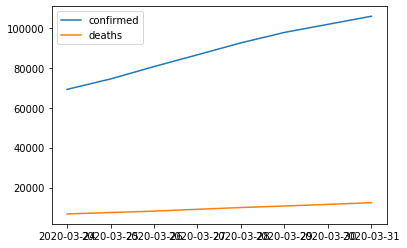

In [85]:
# draw the line chart, for column confirmed and deaths

import requests
import pandas as pd
import matplotlib.pyplot as plt

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='Italy'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'start_date':'2020-03-24',
    'end_date':'2020-03-31'
}

# call requets to load 
r = requests.get(url+'infection/region', params=payload, headers=headers)

data = r.json()

# use pandas to get the data
df = pd.DataFrame.from_dict(data['data']['region'][region])

df = df.T

plt.figure()
df[['confirmed','deaths']].plot(kind='line')

<Figure size 432x288 with 0 Axes>

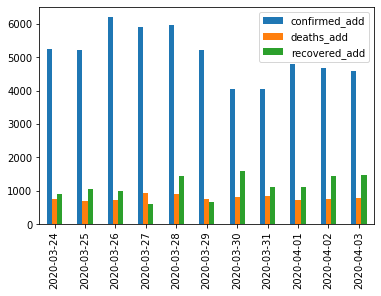

In [76]:
# draw the line chart, for column confirmed and deaths

plt.figure();
df[['confirmed_add','deaths_add','recovered_add']].plot(kind='bar')

In [103]:
# demo for infection/region/detail 


import requests
import pandas as pd
import matplotlib.pyplot as plt

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='US'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'start_date':'2020-03-24',
    'end_date':'2020-03-31'
}
r = requests.get(url+'infection/region/detail', params=payload, headers=headers)

data = r.json()
df = pd.DataFrame.from_dict(data['data'])
df.head()

,area
Alabama,"{'2020-03-24': {'confirmed_add': 46, 'deaths_a..."
Alaska,"{'2020-03-24': {'confirmed_add': 4, 'deaths_ad..."
American Samoa,"{'2020-03-24': {'confirmed_add': 0, 'deaths_ad..."
Arizona,"{'2020-03-24': {'confirmed_add': 91, 'deaths_a..."
Arkansas,"{'2020-03-24': {'confirmed_add': 27, 'deaths_a..."


In [104]:
df = pd.DataFrame.from_dict(data['data']['area'])
df.head()

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wuhan Evacuee,Wyoming
2020-03-24,"{'confirmed_add': 46, 'deaths_add': 0, 'recove...","{'confirmed_add': 4, 'deaths_add': 0, 'recover...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 91, 'deaths_add': 3, 'recove...","{'confirmed_add': 27, 'deaths_add': 2, 'recove...","{'confirmed_add': 430, 'deaths_add': 11, 'reco...","{'confirmed_add': 19, 'deaths_add': 1, 'recove...","{'confirmed_add': 203, 'deaths_add': 2, 'recov...","{'confirmed_add': 36, 'deaths_add': 0, 'recove...","{'confirmed_add': 21, 'deaths_add': 0, 'recove...",...,"{'confirmed_add': 197, 'deaths_add': 3, 'recov...","{'confirmed_add': 41, 'deaths_add': 0, 'recove...","{'confirmed_add': 20, 'deaths_add': 2, 'recove...","{'confirmed_add': 10, 'deaths_add': 0, 'recove...","{'confirmed_add': 39, 'deaths_add': 3, 'recove...","{'confirmed_add': 107, 'deaths_add': 7, 'recov...","{'confirmed_add': 6, 'deaths_add': 0, 'recover...","{'confirmed_add': 56, 'deaths_add': 0, 'recove...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 3, 'deaths_add': 0, 'recover..."
2020-03-25,"{'confirmed_add': 139, 'deaths_add': 1, 'recov...","{'confirmed_add': 7, 'deaths_add': 1, 'recover...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 75, 'deaths_add': 1, 'recove...","{'confirmed_add': 61, 'deaths_add': 0, 'recove...","{'confirmed_add': 460, 'deaths_add': 15, 'reco...","{'confirmed_add': 298, 'deaths_add': 8, 'recov...","{'confirmed_add': 257, 'deaths_add': 7, 'recov...","{'confirmed_add': 15, 'deaths_add': 0, 'recove...","{'confirmed_add': 46, 'deaths_add': 0, 'recove...",...,"{'confirmed_add': 274, 'deaths_add': 3, 'recov...","{'confirmed_add': 42, 'deaths_add': 0, 'recove...","{'confirmed_add': 30, 'deaths_add': 1, 'recove...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 103, 'deaths_add': 0, 'recov...","{'confirmed_add': 263, 'deaths_add': 17, 'reco...","{'confirmed_add': 17, 'deaths_add': 0, 'recove...","{'confirmed_add': 140, 'deaths_add': 2, 'recov...",NaN,"{'confirmed_add': 15, 'deaths_add': 0, 'recove..."
2020-03-26,"{'confirmed_add': 136, 'deaths_add': 0, 'recov...","{'confirmed_add': 15, 'deaths_add': 0, 'recove...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 107, 'deaths_add': 2, 'recov...","{'confirmed_add': 55, 'deaths_add': 0, 'recove...","{'confirmed_add': 901, 'deaths_add': 16, 'reco...","{'confirmed_add': 409, 'deaths_add': 3, 'recov...","{'confirmed_add': 137, 'deaths_add': 2, 'recov...","{'confirmed_add': 11, 'deaths_add': 1, 'recove...","{'confirmed_add': 44, 'deaths_add': 1, 'recove...",...,"{'confirmed_add': 334, 'deaths_add': 6, 'recov...","{'confirmed_add': 56, 'deaths_add': 0, 'recove...","{'confirmed_add': 33, 'deaths_add': 1, 'recove...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 70, 'deaths_add': 1, 'recove...","{'confirmed_add': 616, 'deaths_add': 17, 'reco...","{'confirmed_add': 13, 'deaths_add': 0, 'recove...","{'confirmed_add': 107, 'deaths_add': 3, 'recov...",NaN,"{'confirmed_add': 9, 'deaths_add': 0, 'recover..."
2020-03-27,"{'confirmed_add': 70, 'deaths_add': 3, 'recove...","{'confirmed_add': 2, 'deaths_add': 0, 'recover...","{'confirmed_add': 0, 'deaths_add': 0, 'recover...","{'confirmed_add': 157, 'deaths_add': 5, 'recov...","{'confirmed_add': 46, 'deaths_add': 1, 'recove...","{'confirmed_add': 758, 'deaths_add': 13, 'reco...","{'confirmed_add': 3, 'deaths_add': 8, 'recover...","{'confirmed_add': 279, 'deaths_add': 6, 'recov...","{'confirmed_add': 33, 'deaths_add': 1, 'recove...","{'confirmed_add': 40, 'deaths_add': 0, 'recove...",...,"{'confirmed_add': 374, 'deaths_add': 5, 'recov...","{'confirmed_add': 76, 'deaths_add': 0, 'recove...","{'confirmed_add': 26, 'deaths_add': 1, 'recove...","{'confirmed_add': 2, 'dea

In [105]:
df = pd.DataFrame.from_dict(data['data']['area']['New York'])
df

,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
confirmed_add,4797,5160,7036,6999,7534,7238,7015,9170
deaths_add,52,75,100,142,201,237,253,332
recovered_add,0,0,0,0,0,0,0,0
confirmed,25681,30841,37877,44876,52410,59648,66663,75833
deaths,210,285,385,527,728,965,1218,1550
recovered,0,0,0,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

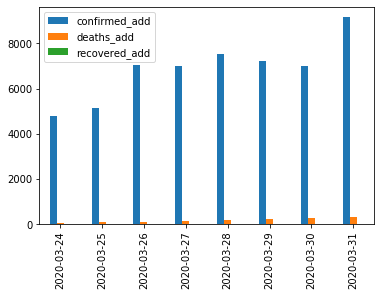

In [107]:
df = df.T

plt.figure();
df[['confirmed_add','deaths_add','recovered_add']].plot(kind='bar')

In [108]:
df = pd.DataFrame.from_dict(data['data']['area']['California'])
df

,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
confirmed_add,430,460,901,758,438,757,1286,1072
deaths_add,11,15,16,13,16,14,22,27
recovered_add,0,0,0,0,0,0,0,0
confirmed,2538,2998,3899,4657,5095,5852,7138,8210
deaths,50,65,81,94,110,124,146,173
recovered,0,0,0,0,0,0,0,0


In [127]:
# demo for infection/area

import requests
import pandas as pd
import matplotlib.pyplot as plt

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# region or country
region='US'
area='New York'

# headers, need the API token
headers = {
    'token': token
}

# the params
payload = {
    'region': region,
    'area': area,
    'start_date':'2020-03-24',
    'end_date':'2020-03-31'
}

r = requests.get(url+'infection/area', params=payload, headers=headers)

data = r.json()
print(data)

df = pd.DataFrame.from_dict(data['data'])
df

{'code': '90000', 'message': 'success', 'data': {'confirmed_add': 54949, 'deaths_add': 1392, 'recovered_add': 0}}


ValueError: If using all scalar values, you must pass an index

In [133]:
# demo for infection/global

import requests
import pandas as pd
import matplotlib.pyplot as plt

# API url
url = 'https://covid-19.adapay.tech/api/v1/'
# token, can call register function get the API token
token = '497115d0c2ff9586bf0fe03088cfdbe2'

# headers, need the API token
headers = {
    'token': token
}

r = requests.get(url+'infection/global',  headers=headers)

data = r.json()

df = pd.DataFrame.from_dict(data['data']['global']['country'])
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,United Kingdom,Uruguay,US,Uzbekistan,Vatican City,Venezuela,Vietnam,Western Sahara,Zambia,Zimbabwe
confirmed_add,422,381,1467,544,16,18,1627,852,2,5881,...,50242,420,395247,519,0,163,239,0,37,10
deaths_add,14,22,193,22,2,1,56,8,0,45,...,5888,7,12694,2,0,7,0,0,1,2
recovered_add,18,131,113,39,2,0,338,87,0,1080,...,231,150,21407,30,0,65,123,0,7,0


In [121]:
df = pd.DataFrame.from_dict(data)

In [40]:
""" 
@author:Bingo.he 
@file: get_target_value.py 
@time: 2017/12/22 
"""
def get_target_value(key, dic, tmp_list):
    """
    :param key: 目标key值
    :param dic: JSON数据
    :param tmp_list: 用于存储获取的数据
    :return: list
    """
    if not isinstance(dic, dict) or not isinstance(tmp_list, list):  # 对传入数据进行格式校验
        return 'argv[1] not an dict or argv[-1] not an list '

    if key in dic.keys():
        tmp_list.append(dic[key])  # 传入数据存在则存入tmp_list

    for value in dic.values():  # 传入数据不符合则对其value值进行遍历
        if isinstance(value, dict):
            get_target_value(key, value, tmp_list)  # 传入数据的value值是字典，则直接调用自身
        elif isinstance(value, (list, tuple)):
            _get_value(key, value, tmp_list)  # 传入数据的value值是列表或者元组，则调用_get_value


    return tmp_list


def _get_value(key, val, tmp_list):
    for val_ in val:
        if isinstance(val_, dict):  
            get_target_value(key, val_, tmp_list)  # 传入数据的value值是字典，则调用get_target_value
        elif isinstance(val_, (list, tuple)):
            _get_value(key, val_, tmp_list)   # 传入数据的value值是列表或者元组，则调用自身
    
list0=[]
print(get_target_value('New York',data,list0))

[{'2020-03-26': {'confirmed_add': 7036, 'deaths_add': 100, 'recovered_add': 0, 'confirmed': 37877, 'deaths': 385, 'recovered': 0}, '2020-03-27': {'confirmed_add': 6999, 'deaths_add': 142, 'recovered_add': 0, 'confirmed': 44876, 'deaths': 527, 'recovered': 0}, '2020-03-28': {'confirmed_add': 7534, 'deaths_add': 201, 'recovered_add': 0, 'confirmed': 52410, 'deaths': 728, 'recovered': 0}, '2020-03-29': {'confirmed_add': 7238, 'deaths_add': 237, 'recovered_add': 0, 'confirmed': 59648, 'deaths': 965, 'recovered': 0}, '2020-03-30': {'confirmed_add': 7015, 'deaths_add': 253, 'recovered_add': 0, 'confirmed': 66663, 'deaths': 1218, 'recovered': 0}}]


In [61]:
url = 'https://covid-19.adapay.tech/api/v1/'

r = requests.post(url+'authentication/register', data = {'email':'wingfish@gmail.com'})

print(r)



<Response [400]>
